In [61]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df['species'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [101]:
df[df['species']==2]['petal length (cm)'].values

array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
       5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
       4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
       5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [111]:
# 7.1.2 연습문제 
#1. 
virginica_data = df[df['species']==2]['petal length (cm)'].values

def virginica(n) : 
    bins = np.linspace(0,10,n+1)
    sample_mean = np.mean(virginica_data)
    sample_median = np.median(virginica_data)
    ns, _ = np.histogram(virginica_data, bins=bins)
    max_index = np.argmax(ns)
    sample_mode = 0.5*(bins[max_index]+bins[max_index+1])

    print(f'표본평균 : {sample_mean}')
    print(f'표본중앙값 : {sample_median}')
    print(f'표본최빈값 : {sample_mode}')
    print()

    sns.distplot(virginica_data, bins=bins)
    plt.axvline(sample_mean, ls='-',c='g',label='표본평균')
    plt.axvline(sample_median, ls='-.',c='b',label='표본중앙값')
    plt.axvline(sample_mode,ls='--',c='r',label='표본최빈값')
    plt.legend()
    plt.title(f'n={n}')


표본평균 : 5.5520000000000005
표본중앙값 : 5.55
표본최빈값 : 5.5



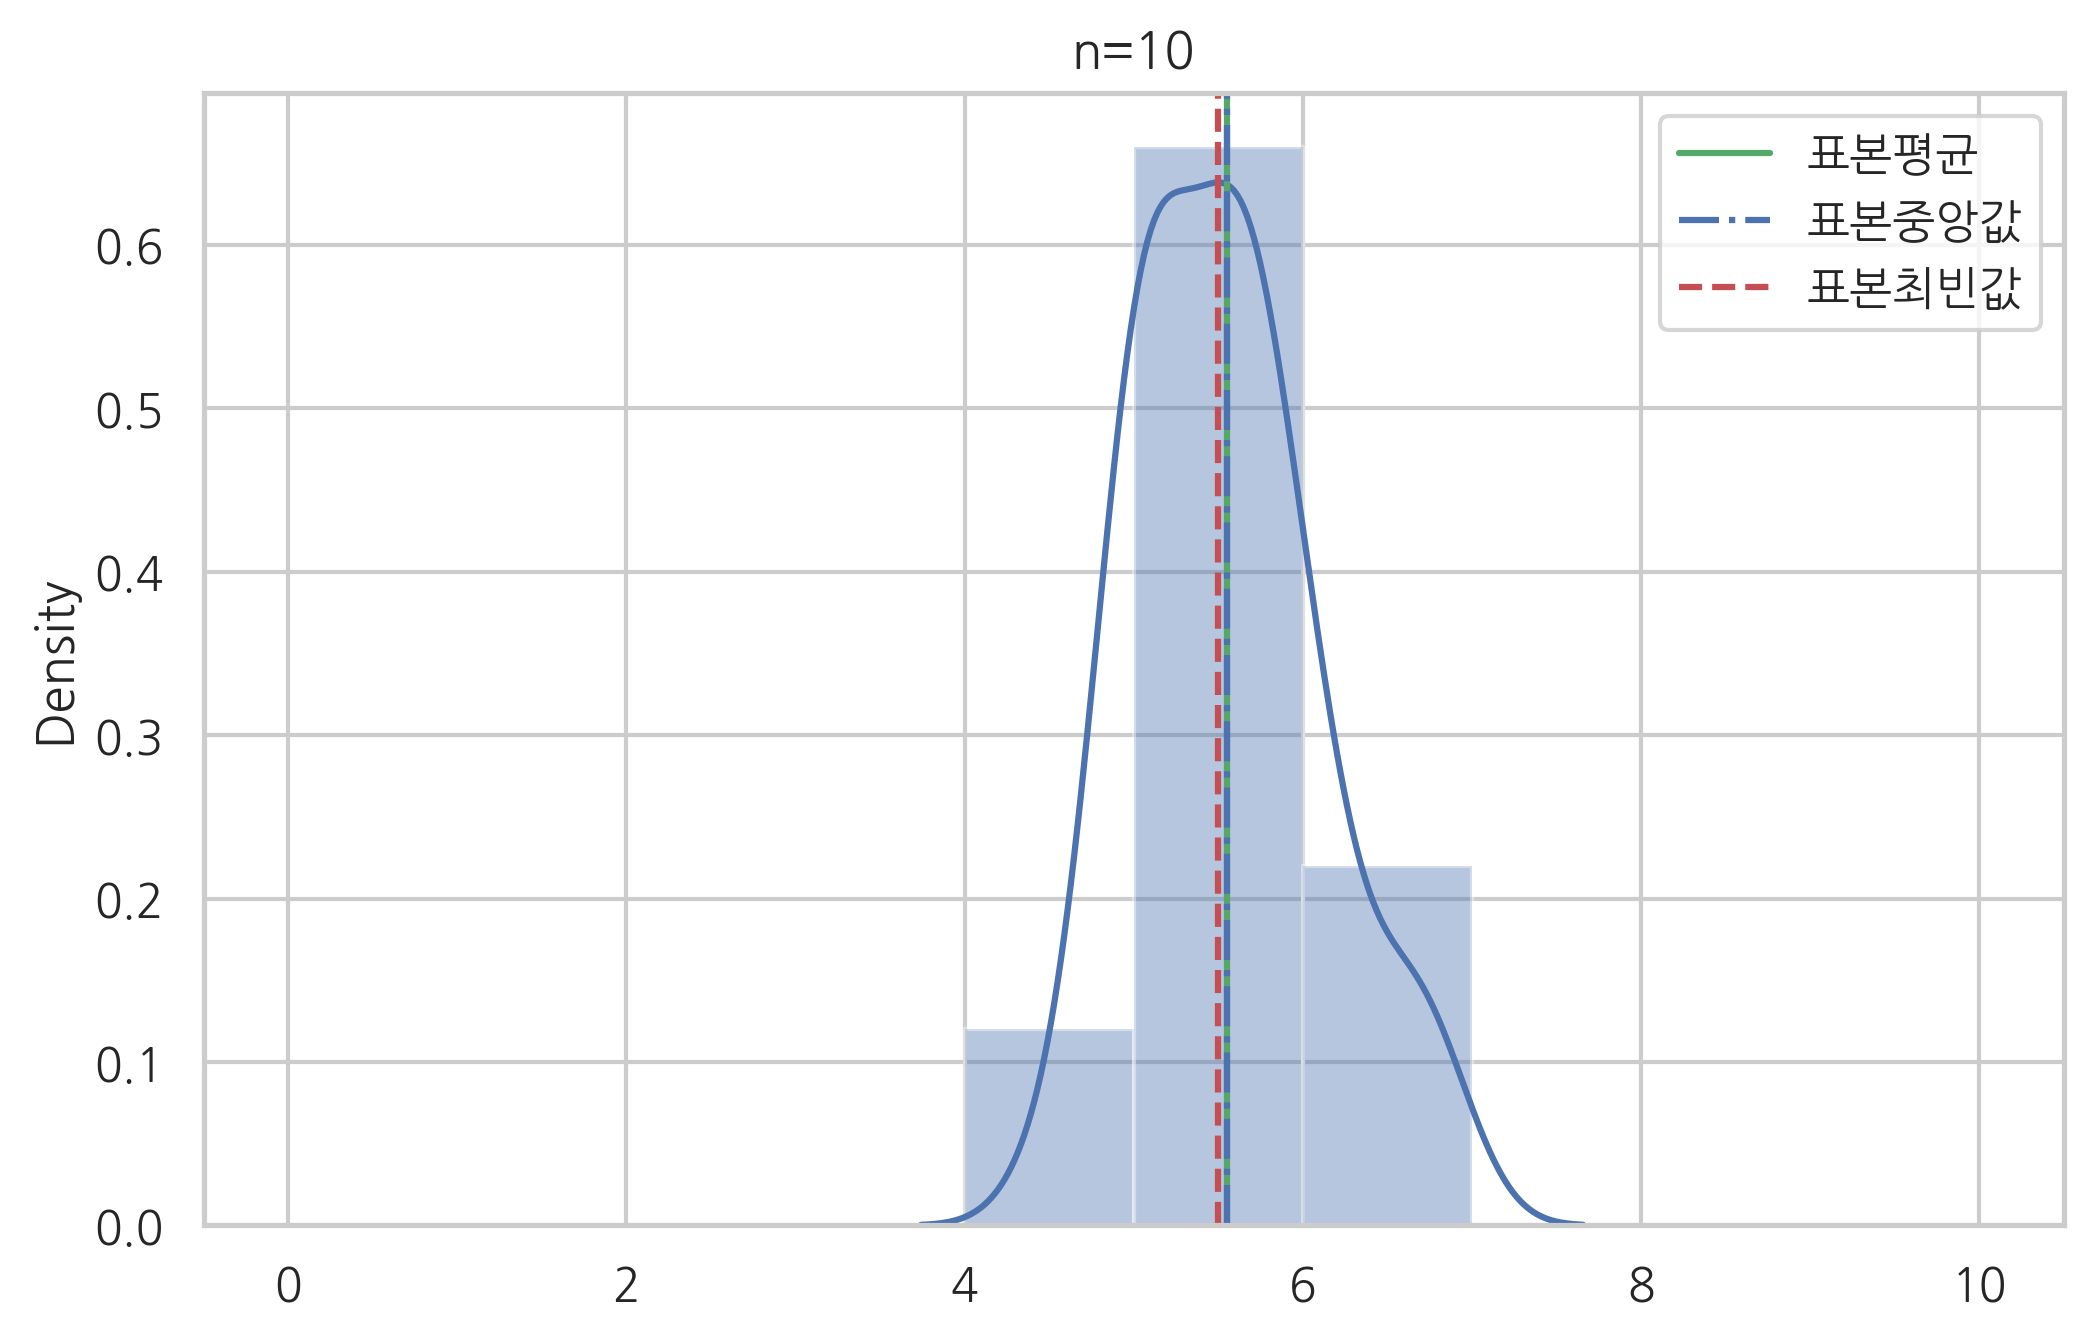

In [112]:
virginica(10)

표본평균 : 5.5520000000000005
표본중앙값 : 5.55
표본최빈값 : 5.5



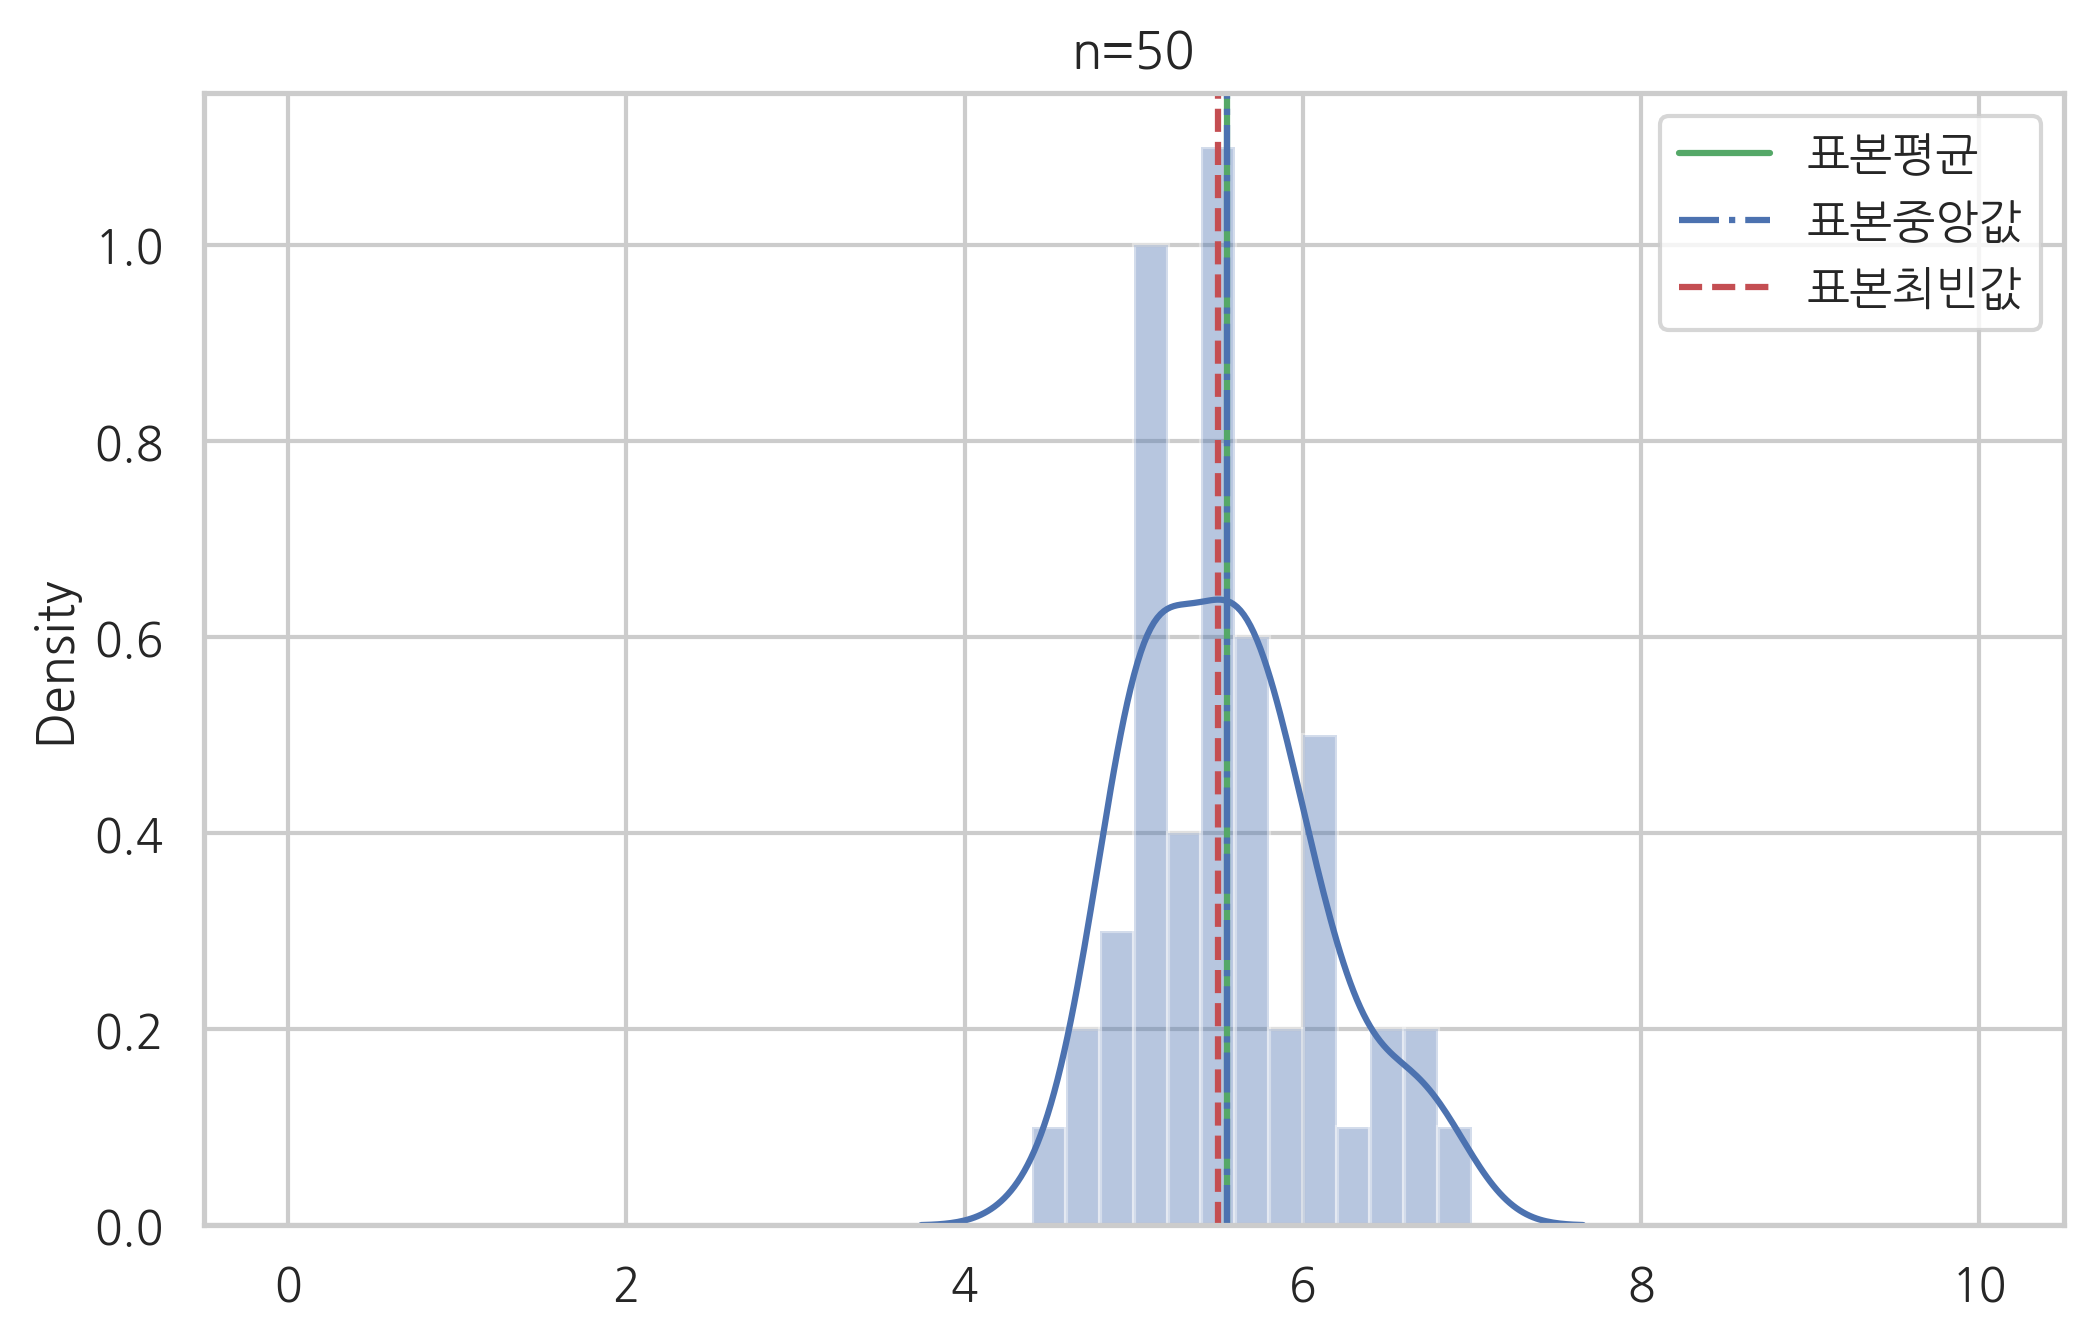

In [113]:
virginica(50)

표본평균 : 5.5520000000000005
표본중앙값 : 5.55
표본최빈값 : 5.050000000000001



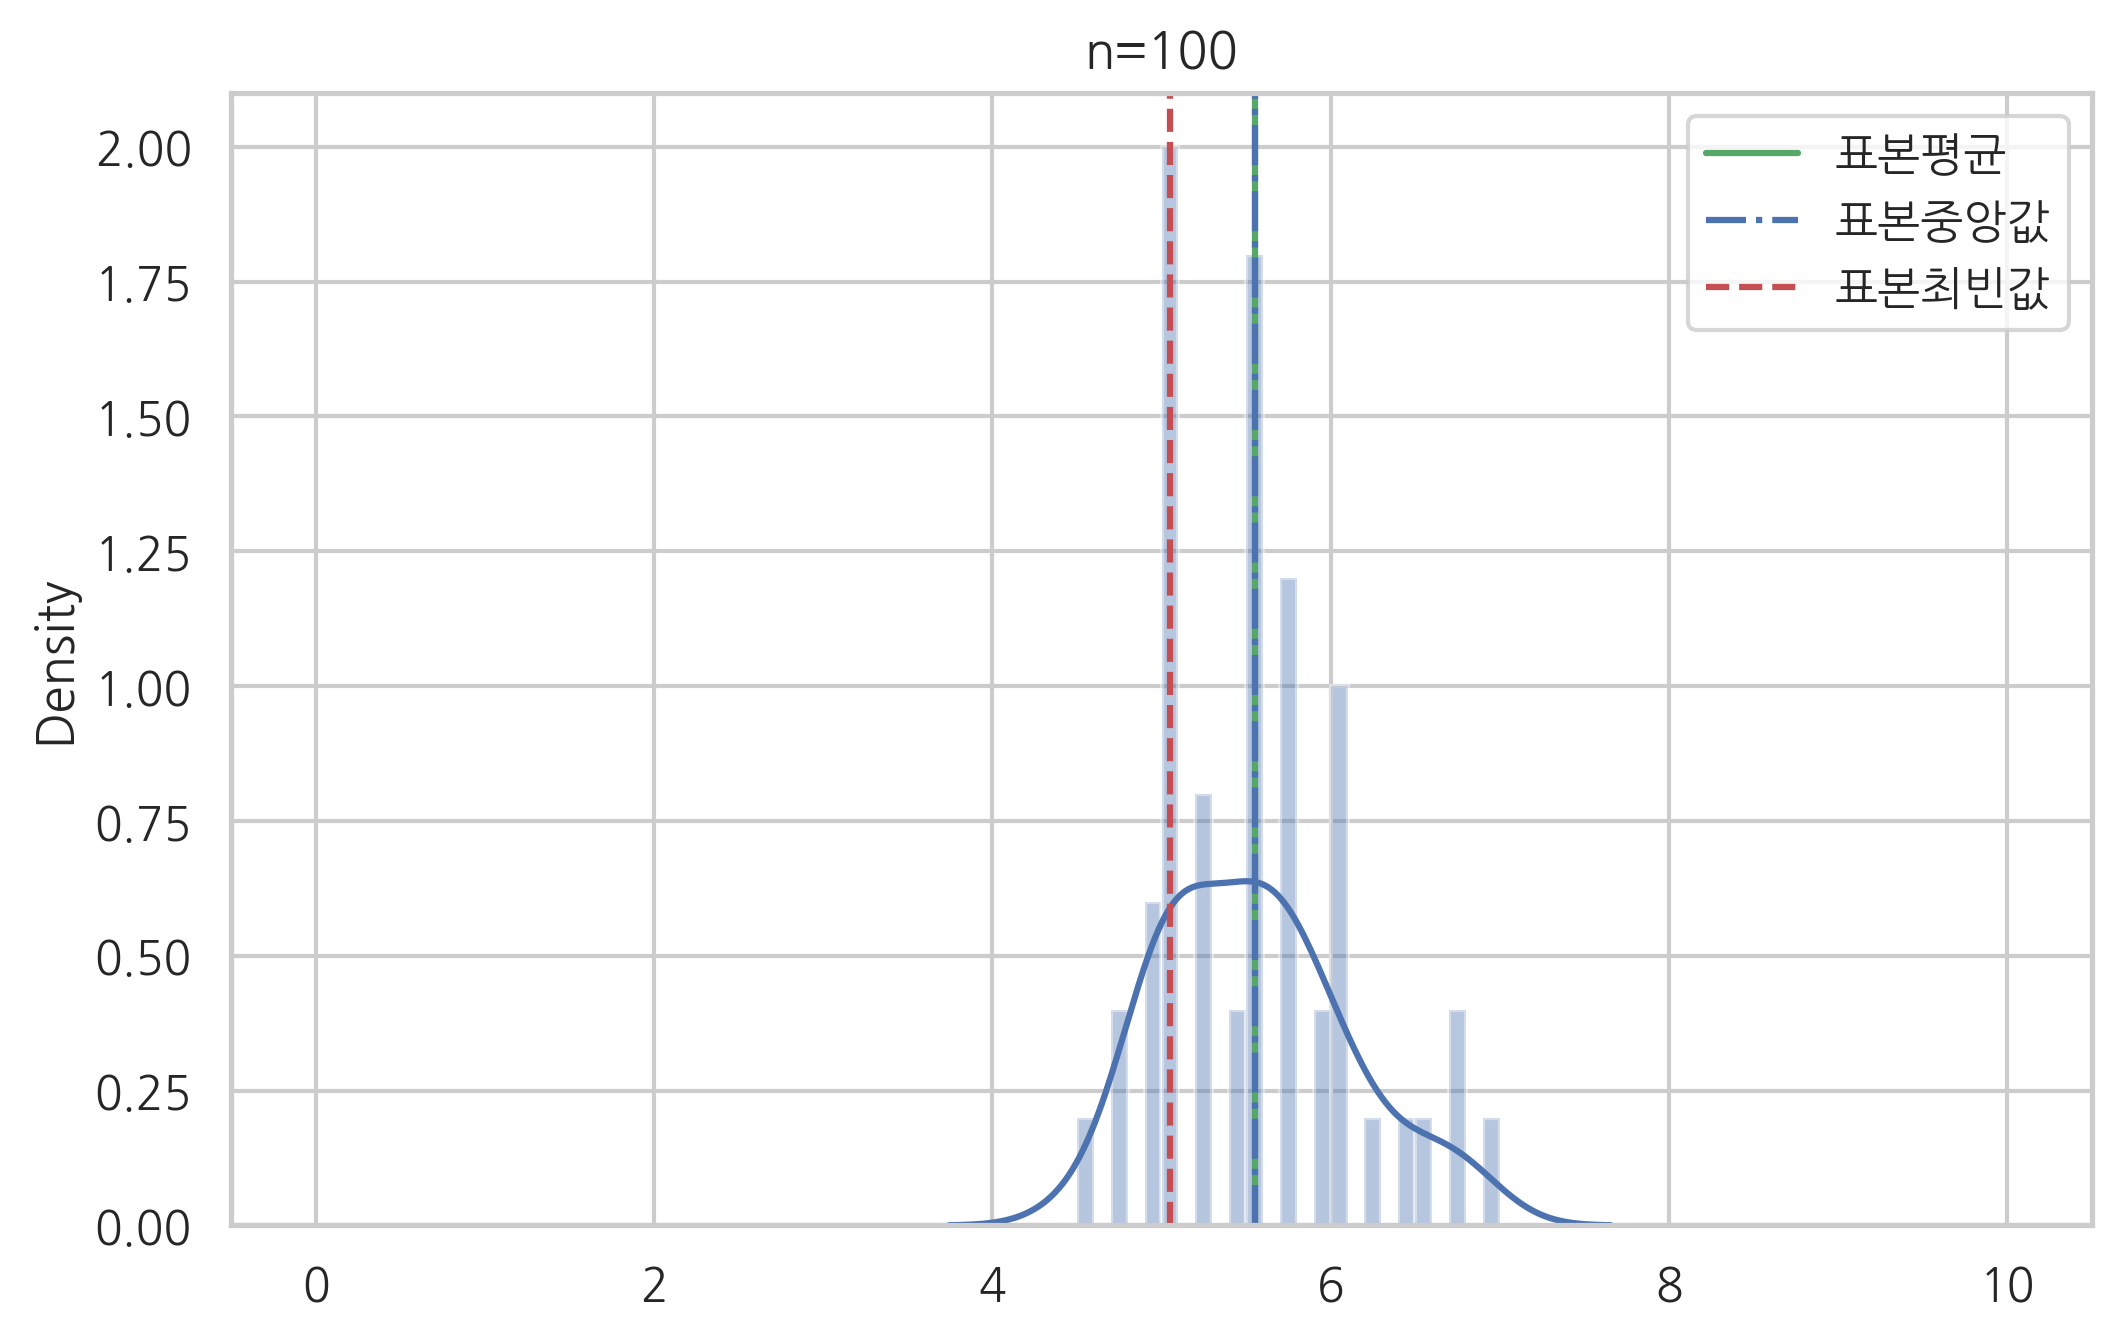

In [114]:
virginica(100)

In [123]:
# 표본표준편차,표본분산
np.random.seed(0)
x = sp.stats.norm(0,2).rvs(1000)

print(f'표본분산 : {np.var(x)}',end='');print(f'표본표준편차 : {np.std(x)}')
print()
print(f'비편향표본분산 : {np.var(x,ddof=1)}',end='');print(f'비편향표본표준편차 : {np.std(x,ddof=1)}')


표본분산 : 3.896937825248617표본표준편차 : 1.9740663173380515

비편향표본분산 : 3.900838663912529비편향표본표준편차 : 1.9750540913890255


In [145]:
#7.1.3 연습문제 
import pandas_datareader.data as web

df = web.DataReader('DJCA',data_source='fred').dropna()['DJCA']
r = np.log(df/df.shift(1)).dropna().values

#1. 
print(f'표본평균 : {np.mean(r)}',end=' ');print(f'표본분산 : {np.var(r)}',end=' ');print(f'표본표준편차 : {np.std(r)}')
print()
#2. 
print(f'연간변동성 : {np.std(r)*np.sqrt(256)*100}')
print()


표본평균 : 0.0005076263466611876 표본분산 : 0.0001516492711311546 표본표준편차 : 0.01231459585740249

연간변동성 : 19.703353371843985



In [147]:
# 표본비대칭도와 표본첨도
sp.stats.skew(x), sp.stats.kurtosis(x)

(0.03385895323565712, -0.0467663244783294)

In [161]:
# 각종 표본모멘트 
print(f'표본분산 : {np.var(x)}')
print(f'2차 표본모멘트 : {sp.stats.moment(x,2)}')
print('같다')

표본분산 : 3.896937825248617
2차 표본모멘트 : 3.896937825248617
같다


In [169]:
print(f'표본첨도 : {sp.stats.kurtosis(x)}')
print(f'4차 표본모멘트 : {(sp.stats.moment(x,4)/(sp.stats.moment(x,2))**2)-3}')

표본첨도 : -0.0467663244783294
4차 표본모멘트 : -0.0467663244783294


In [172]:
print(f'표본비대칭도 : {sp.stats.skew(x)}')
print(f'3차 표본모멘트 : {sp.stats.moment(x,3)/(np.sqrt(sp.stats.moment(x,2))**3)}')

표본비대칭도 : 0.03385895323565712
3차 표본모멘트 : 0.03385895323565713


In [175]:
print(f'표본평균 : {np.mean(x)}')
print(f'1차 모멘트 : {sp.stats.moment(x,1)}')

표본평균 : -0.09051341498039077
1차 모멘트 : 0.0
